# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [2]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.10.0


# Task 2: Rotation

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=40
)

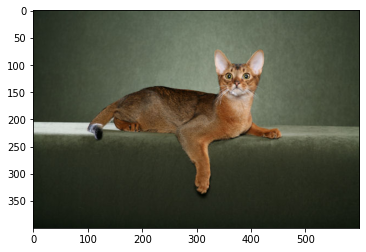

In [4]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


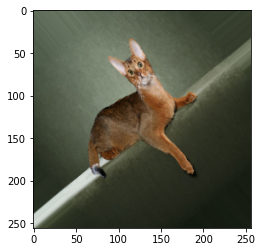

In [5]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range = [-100,-50,0,50,100],
    height_shift_range = [-50,0,50]
)

Found 1 images belonging to 1 classes.


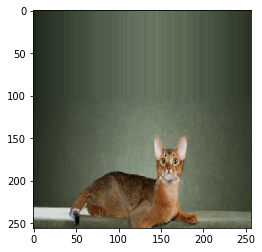

In [11]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


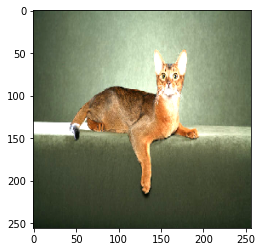

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range = (0.5,2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


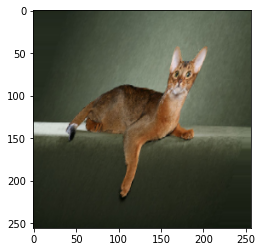

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range = 40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


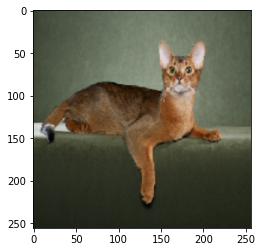

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range = [0.5,2]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


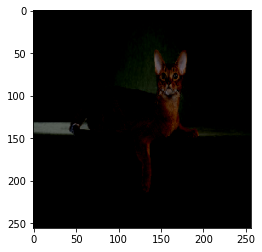

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range = 200
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


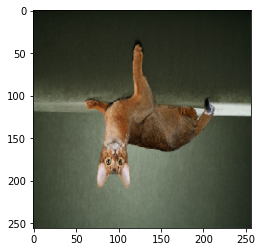

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code her
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170498071/170498071 [==============================] - 594s 3us/step


In [24]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.5175839 0.9937428 [[6]]
120.70756512369792


### Samplewise

In [26]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-3.973643e-08 1.0 [[7]]


# Task 10: Rescale and Preprocessing Function

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [28]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [29]:
print(x.mean(), x.std(), y)

0.052719086 0.3003909 [[3]]


# Task 11: Using in Model Training

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [33]:
# Your code here
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False, input_shape=(32,32,3),pooling='avg'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [34]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    epochs=1, steps_per_epoch=10
)

10/10 [==============================] - 10s 232ms/step - loss: 3.4694 - accuracy: 0.0875
